In [1]:
%load_ext autoreload
%autoreload 2


In [10]:
import numpy as np
from segment_anything import SamPredictor, sam_model_registry, SamAutomaticMaskGenerator
import cv2

import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [83]:
def create_segmented_image(masks_info, original_image):
    # Assuming masks_info provides masks in a compatible format, else convert them.
    if not masks_info:
        return original_image  # Return original if no masks to process

    sorted_anns = sorted(masks_info, key=(lambda x: x['area']), reverse=True)

    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))
    img[:, :, 3] = 0
    for ann in sorted_anns:
        m = ann['segmentation']
        color_mask = np.concatenate([np.random.randint(0, 256), 255])
        img[m] = color_mask

    return img

In [6]:
MODEL_TYPE = "vit_b"
CHECKPOINT_PATH = "../ai_model/sam_vit_b_01ec64.pth"
sam_model = sam_model_registry[MODEL_TYPE](checkpoint=CHECKPOINT_PATH)
mask_generator = SamAutomaticMaskGenerator(sam_model)

In [9]:

file_path = "../example_images/dog.jpg"
image = cv2.imread(file_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

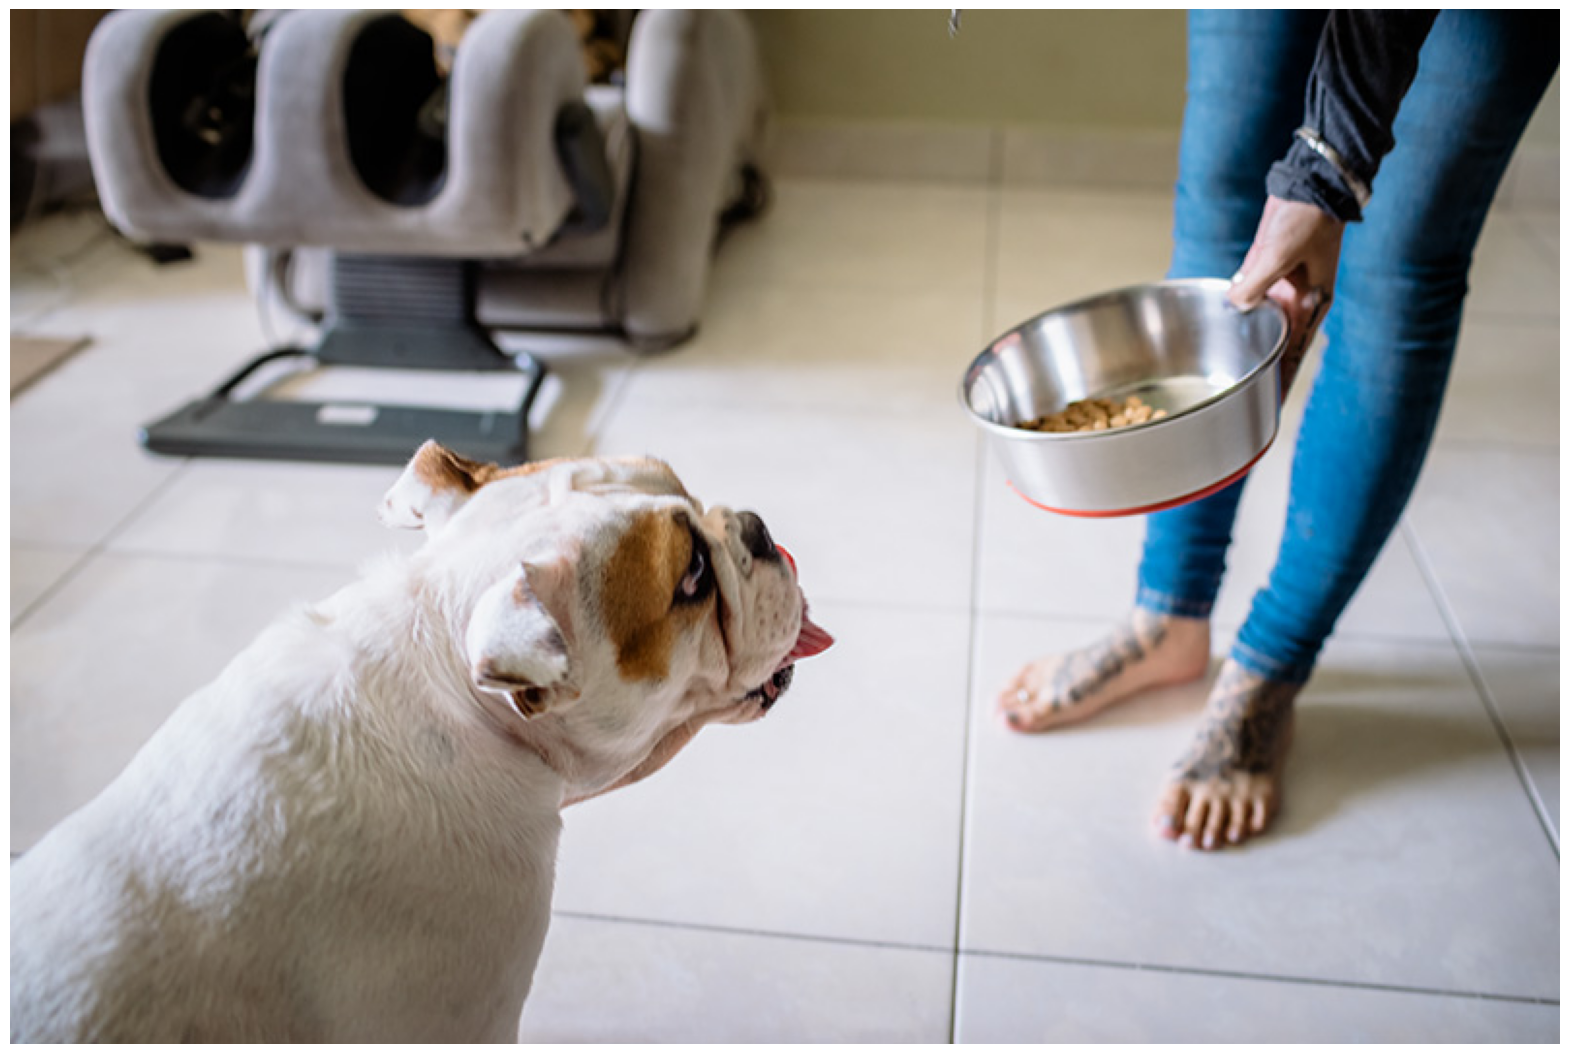

In [11]:
plt.figure(figsize=(20, 20))
plt.imshow(image)
plt.axis('off')
plt.show()

In [12]:
masks = mask_generator.generate(image)

In [13]:
print(len(masks))
print(masks[0].keys())

44
dict_keys(['segmentation', 'area', 'bbox', 'predicted_iou', 'point_coords', 'stability_score', 'crop_box'])


In [16]:
def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)

    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))
    img[:,:,3] = 0
    for ann in sorted_anns:
        m = ann['segmentation']
        color_mask = np.concatenate([np.random.random(3), [0.35]])
        img[m] = color_mask
    ax.imshow(img)

In [99]:
def create_segmentation_layer(masks, original_image):
    # Assuming masks_info provides masks in a compatible format, else convert them.
    if len(masks) == 0:
        # return a blank image if no masks to process
        return np.zeros((original_image.shape[0], original_image.shape[1], 4)).astype(np.uint8)
    
    sorted_masks = sorted(masks, key=(lambda x: x['area']), reverse=True)
    
    img = np.zeros((sorted_masks[0]['segmentation'].shape[0], sorted_masks[0]['segmentation'].shape[1], 4)).astype(np.uint8)
    
    img[:, :, 3] = 0
    for mask in sorted_masks:
        m = mask['segmentation']
        color_mask = np.concatenate([[np.random.randint(0, 256) for _ in range(3)] , [255]])
        img[m] = color_mask

    return img

In [102]:
mask_img = create_segmentation_layer(masks, image)

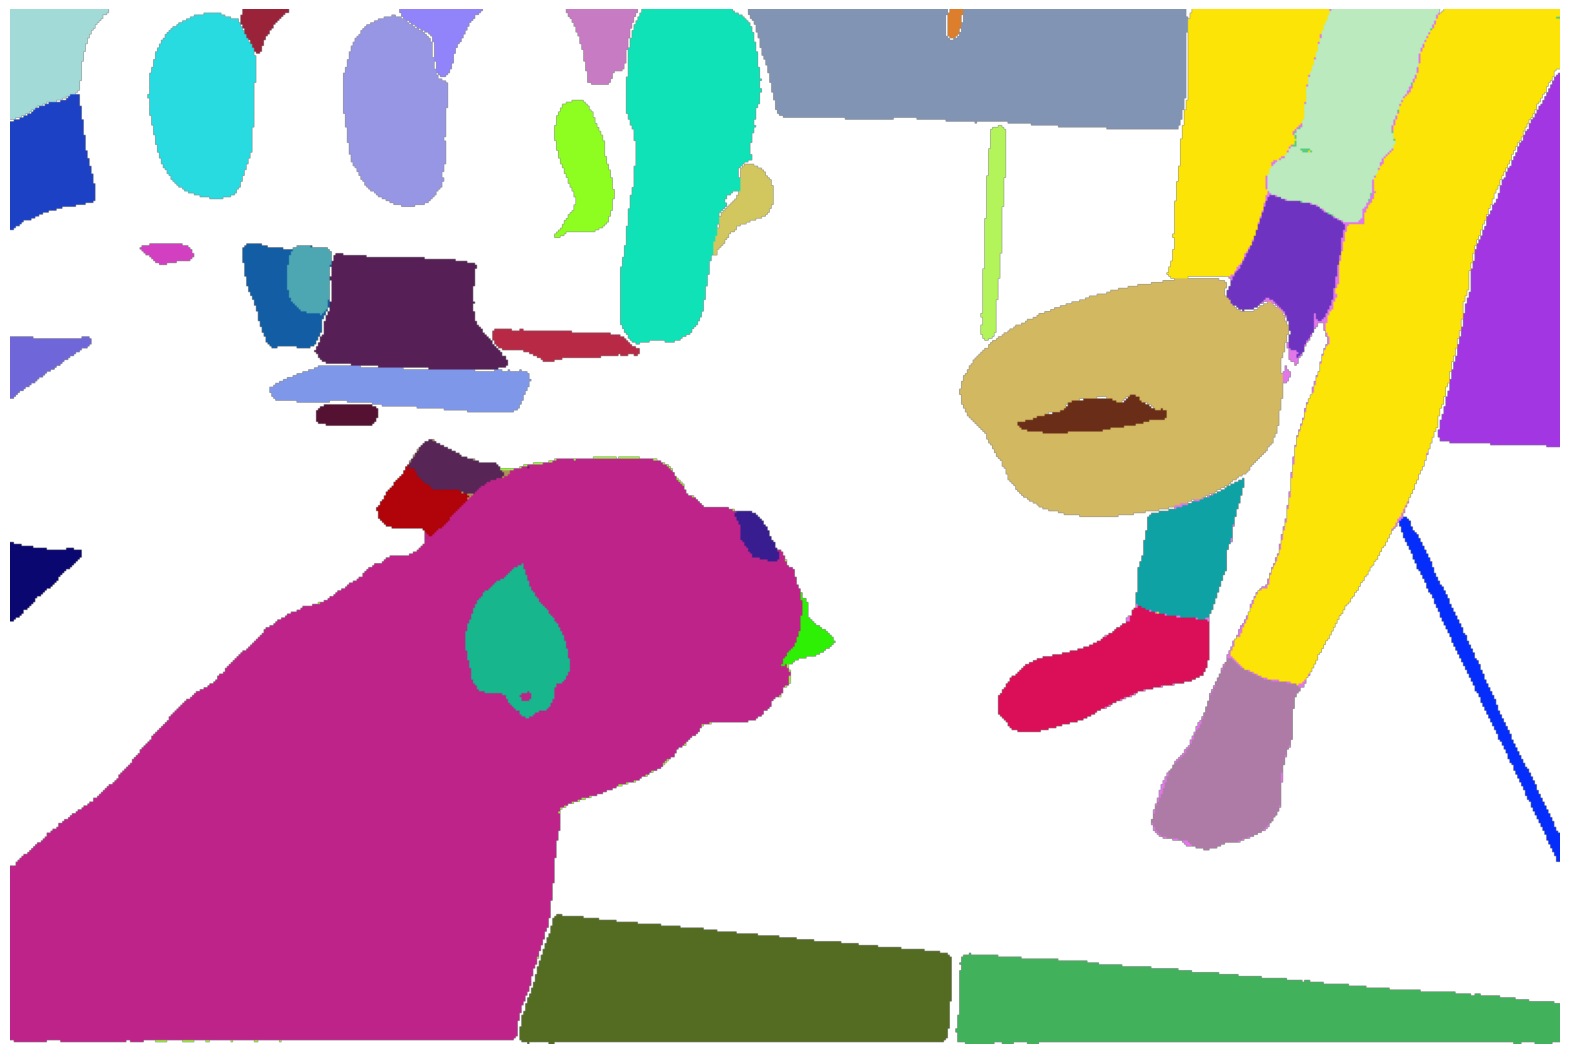

In [103]:
plt.figure(figsize=(20,20))
plt.imshow(mask_img)
plt.axis('off')
plt.show()

In [104]:
def create_rgba_image(rgb_image):
    alpha_channel = np.ones((rgb_image.shape[0], rgb_image.shape[1]), dtype=np.uint8) * 255
    return np.dstack((rgb_image, alpha_channel))

In [111]:
def combine_two_images(image1, image2):
    # add a dimension to image1
    return cv2.addWeighted(image1, 0.7, image2, 0.3, 0)

In [112]:
rgba_image = create_rgba_image(image)

In [113]:
combined_image = combine_two_images(rgba_image, mask_img)


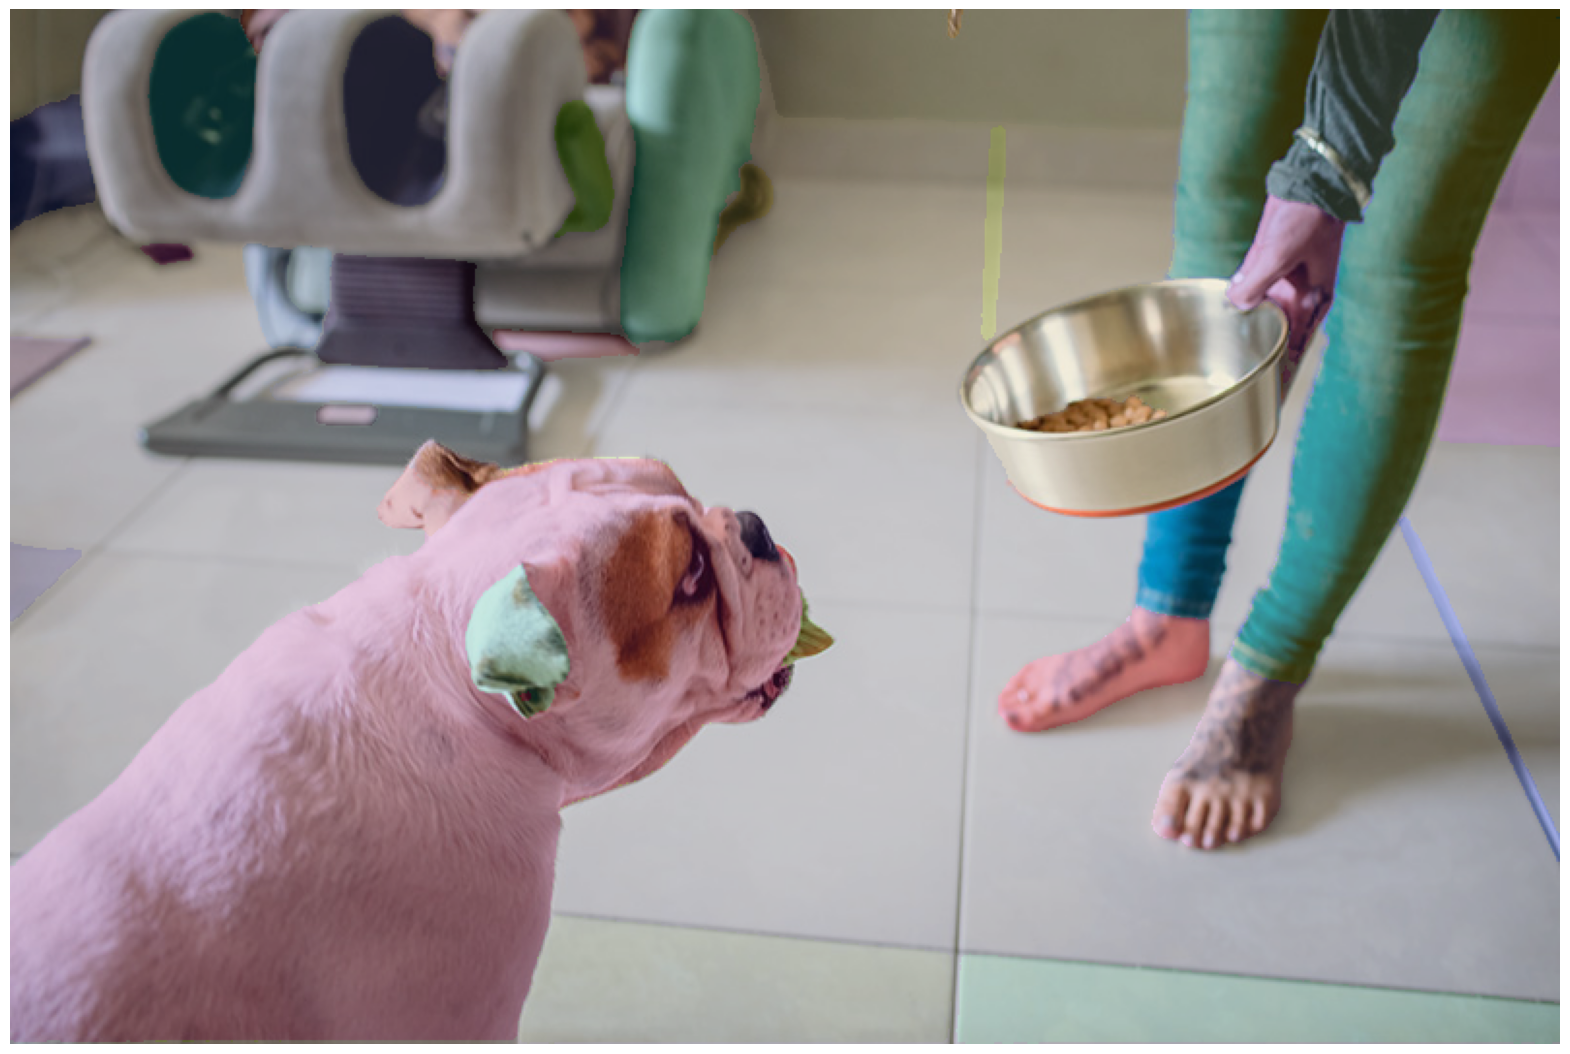

In [114]:
plt.figure(figsize=(20,20))
plt.imshow(combined_image)
plt.axis('off')
plt.show()

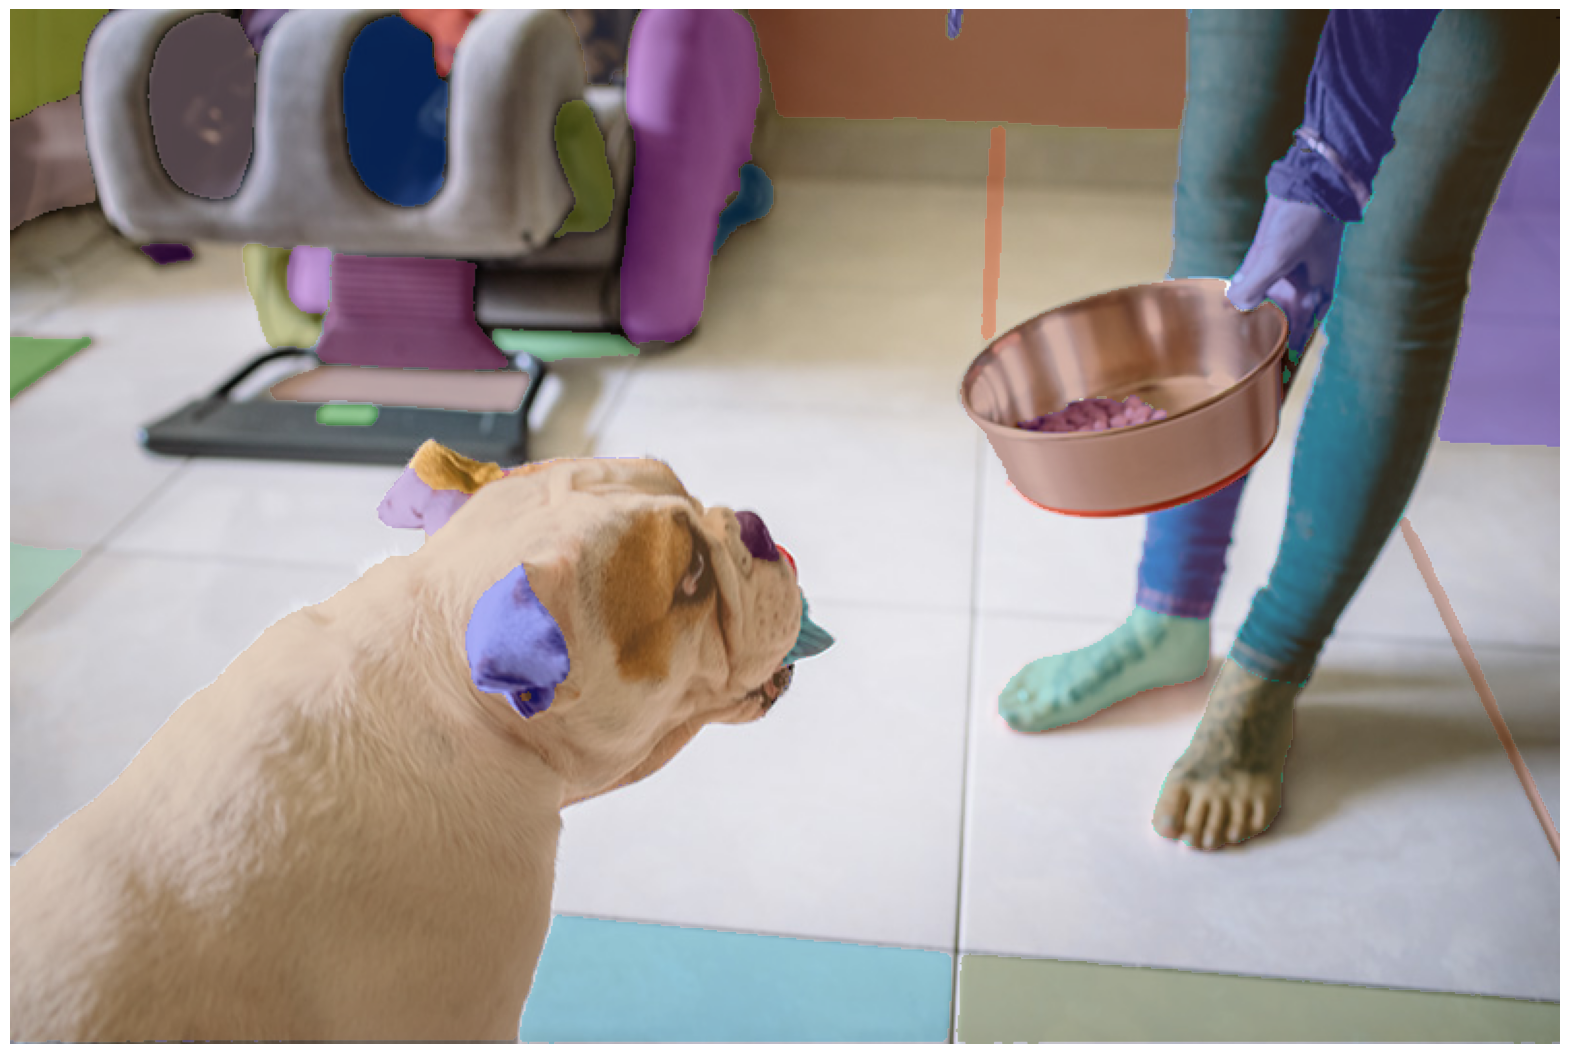

In [34]:
plt.figure(figsize=(20,20))
plt.imshow(image)
show_anns(masks)
plt.axis('off')
plt.show() 